# Testing LOSD
### Geschossflächen nach Nutzungsart, Stadtquartier und Bauperiode seit 1970

Diese Daten umfassen die Geschossflächen nach Nutzungsart und Stadtquartier seit 1970. Ab 1995 wird zusätzlich nach Bauperiode unterschieden.

Bitte beachten Sie für das korrekte Verständnis zu den Daten die unten aufgeführten weiteren Erläuterungen in der Rubrik «Bemerkungen».

https://data.integ.stadt-zuerich.ch/dataset/bau523od5231

Datum: 22.05.2024

### Colab
Mit Colab kann das Jupyter-Notebook interaktiv im Browser gestartet werden. 

Klicke auf den Button:+

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](colab_b_bau5022_losd_bau_neubau_whg-projektiert_projstatus_zizahl_quartier_seit2009_od5022.ipynb)


### Importiere die notwendigen Packages

In [1]:
#%pip install altair datetime folium geopandas io requests matplotlib numpy pandas seaborn plotly
!pip install altair==5.0.1 vl-convert-python

In [2]:
import altair as alt
import datetime
import folium 
import geopandas as gpd
import io
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pivottablejs
#from pivottablejs import pivot_ui
import plotly.express as px
import requests
import seaborn as sns

Importiere die eigenen Funktionen, die unter ../0_scripts abegelegt sind:

1) Klone das Github-Repo auf Colab. Sonst werden die Skripts nicht gelesen...

In [ ]:
!git clone https://github.com/DonGoginho/colab.git


fatal: destination path 'colab' already exists and is not an empty directory.


2) Checke die Schreibrechte in den geklonten Verzeichnissen

In [ ]:
!ls -l /content/colab
!ls -l /content/colab/losd


total 20
drwxr-xr-x 4 root root 4096 Jul  3 12:58 0_scripts
drwxr-xr-x 2 root root 4096 Jul  3 12:58 archiv
-rw-r--r-- 1 root root 1211 Jul  3 12:58 LICENSE
drwxr-xr-x 5 root root 4096 Jul  3 12:58 losd
-rw-r--r-- 1 root root 1755 Jul  3 12:58 README.md
total 4484
-rw-r--r-- 1 root root  216728 Jul  3 12:58 bev3160_losd_bev_bestand_jahr_konfession_od3160.ipynb
-rw-r--r-- 1 root root 1755589 Jul  3 12:58 bev3240_losd_bev_bestand_jahr_quartier_od3240.ipynb
-rw-r--r-- 1 root root  696643 Jul  3 12:58 bev3241_losd_bev_bestand_jahr_statzonen_od3241.ipynb
-rw-r--r-- 1 root root 1152082 Jul  3 12:58 bev3242_losd_bev_bestand_jahr_kreis_od3242.ipynb
-rw-r--r-- 1 root root  285094 Jul  3 12:58 bev3243_losd_bev_bestand_jahr_od3243.ipynb
-rw-r--r-- 1 root root  461744 Jul  3 12:58 colab_bev3243_losd_bev_bestand_jahr_od3243.ipynb
drwxr-xr-x 2 root root    4096 Jul  3 12:59 grafiken_testing
drwxr-xr-x 2 root root    4096 Jul  3 12:58 org_ipynb
drwxr-xr-x 2 root root    4096 Jul  3 12:58 saved_data


3) Importiere die Skripts

In [ ]:
import sys
sys.path.append('/content/colab/0_scripts')

import my_py_dataviz_functions as mypy_dv
import my_py_dataloading_functions as mypy_dl

In [4]:
SSL_VERIFY = False
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [5]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

### Settings
Definiere Settings. 
Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen)

In [6]:
#pd.options.display.float_format = lambda x : '{:,.1f}'.format(x) if (np.isnan(x) | np.isinf(x)) else '{:,.0f}'.format(x) if int(x) == x else '{:,.1f}'.format(x)
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

#### Zeitvariabeln

In [7]:
#Zeitvariabeln als Strings:
now = datetime.date.today()
year_today = now.strftime("%Y")
date_today = "_"+now.strftime("%Y-%m-%d")

#Zeitvariabeln als Integers:
int_times = now.timetuple()
aktuellesJahr = int_times[0]
aktuellerMonat = int_times[1]
selectedMonat = int_times[1]-2
#print(aktuellesJahr, aktuellerMonat,'datenstand: ', selectedMonat, int_times)

### Daten importieren und Metadaten checken

- status: int / prod
- data_source: web / ld / dropzone
- datums_attr: beschreibt das oder die Datumsfelder, die als Datum geparsed werden sollen. Falls es keines gibt: None

In [8]:
#speichere die variable global, damit ich sie später verwenden kann, wenn ich grafiken mit diesem namen speichere.
package_name = "bau523od5231"

In [9]:
data2betested = mypy_dl.load_data(
    status = 'int'
    , data_source = 'ld'
    , package_name = package_name
    , dataset_name = "bau523od5231.csv"    
    , datums_attr = ['ZEIT_LANG']
    )

fp lautet:https://ld.integ.stadt-zuerich.ch/statistics/view/BAU523OD5231/observation?format=csv


 **Überprüfe die Metadaten:**

 **Dataset auf INTEG-Datakatalog:** Link https://data.integ.stadt-zuerich.ch/dataset/bau523od5231 

 **View auf INTEG-LD:** Link https://ld.integ.stadt-zuerich.ch/statistics/view/BAU523OD5231 

data_source: web


In [10]:
data2betested.head(2).T

,0,1
ZEIT_LANG,2018-12-31 00:00:00,2019-12-31 00:00:00
ZEIT_CODE,Z31122018,Z31122019
RAUM_LANG,Fluntern,Wipkingen
RAUM_CODE,R00071,R00102
BAP_LANG,1920 bis 1939,1960 bis 1979
BAP_CODE,BAP2107,BAP2109
GNA_LANG,Produktion,Büros
GNA_CODE,GNA1030,GNA1060
HPN_LANG,"Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ...","Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ..."
HPN_CODE,HPN0001,HPN0001


Berechne weitere Attribute falls notwendig

In [11]:
data2betested = (
    data2betested
    .copy()
    .assign(
        #Aktualisierungs_Datum_str= lambda x: x.Aktualisierungs_Datum.astype(str),
        StichtagDatJahr = lambda x: x.ZEIT_LANG,
        StichtagDatJahr_str = lambda x: x.ZEIT_LANG.astype(str),
        Jahr = lambda x: x.ZEIT_LANG.dt.year,
        #Jahr_nbr = lambda x: x.ZEIT_CODE.str[-4:].astype(int),    
        RAUM_my_sort = lambda x: x.RAUM_CODE.str[-3:].astype(int),

    )
    .sort_values('ZEIT_LANG', ascending=False)
    )
data2betested.head(2).T

,20626,3475
ZEIT_LANG,2023-12-31 00:00:00,2023-12-31 00:00:00
ZEIT_CODE,Z31122023,Z31122023
RAUM_LANG,Weinegg,Wipkingen
RAUM_CODE,R00083,R00102
BAP_LANG,1980 bis 1999,2000 bis 2019
BAP_CODE,BAP2110,BAP2111
GNA_LANG,Produktion,Wohnen
GNA_CODE,GNA1030,GNA1010
HPN_LANG,"Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ...","Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ..."
HPN_CODE,HPN0001,HPN0001


Zeitbereich aus den Daten:

In [12]:
data_max_date = str(max(data2betested.ZEIT_LANG).year)
data_min_date = str(min(data2betested.ZEIT_LANG).year)

print(f"Die Daten haben ein Minimumjahr von {data_min_date} und ein Maximumjahr von {data_max_date}")


Die Daten haben ein Minimumjahr von 1995 und ein Maximumjahr von 2023


Temp speichere die csv-Datei, da es immer wieder zu Ausfällen kommt. So kann ich mal den Report fertig bauen.

In [13]:
docname = package_name +date_today+".csv"
print(docname)

bau523od5231_2024-07-04.csv


In [14]:
data2betested.to_csv('/content/colab/losd/saved_data/'+docname, index=False)

### Einfache Datentests

In [15]:
data2betested.head(2).T

,20626,3475
ZEIT_LANG,2023-12-31 00:00:00,2023-12-31 00:00:00
ZEIT_CODE,Z31122023,Z31122023
RAUM_LANG,Weinegg,Wipkingen
RAUM_CODE,R00083,R00102
BAP_LANG,1980 bis 1999,2000 bis 2019
BAP_CODE,BAP2110,BAP2111
GNA_LANG,Produktion,Wohnen
GNA_CODE,GNA1030,GNA1010
HPN_LANG,"Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ...","Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ..."
HPN_CODE,HPN0001,HPN0001


In [16]:
data2betested.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 28805 entries, 20626 to 8432
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ZEIT_LANG            28805 non-null  datetime64[ns]
 1   ZEIT_CODE            28805 non-null  object        
 2   RAUM_LANG            28805 non-null  object        
 3   RAUM_CODE            28805 non-null  object        
 4   BAP_LANG             28805 non-null  object        
 5   BAP_CODE             28805 non-null  object        
 6   GNA_LANG             28805 non-null  object        
 7   GNA_CODE             28805 non-null  object        
 8   HPN_LANG             28805 non-null  object        
 9   HPN_CODE             28805 non-null  object        
 10  GNF                  28805 non-null  float64       
 11  KREISEZH_LANG        28805 non-null  object        
 12  KREISEZH_CODE        28805 non-null  object        
 13  StichtagDatJahr      28805 non-nu

In [17]:
print(f'The dataset has {data2betested.shape[0]:,.0f} rows (observations) and {data2betested.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {data2betested.duplicated().sum()} exact duplicates in the data.')

The dataset has 28,805 rows (observations) and 17 columns (variables).
There seem to be 0 exact duplicates in the data.


Welches sind die Quartiere ohne Werte bei BEW?

In [18]:
data2betested[np.isnan(data2betested.GNF)]

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,BAP_LANG,BAP_CODE,GNA_LANG,...,GNF,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr,StichtagDatJahr_str,Jahr,RAUM_my_sort


### Verwende das Datum als Index

While we did already parse the `datetime` column into the respective datetime type, it currently is just a regular column. 
**To enable quick and convenient queries and aggregations, we need to turn it into the index of the DataFrame**

In [19]:
data2betested = data2betested.set_index("StichtagDatJahr") 
data2betested = data2betested.sort_index()

In [20]:
data2betested.index.year.unique()

Index([1995, 2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023],
      dtype='int32', name='StichtagDatJahr')

### Beschreibe einzelne Attribute

Beschreibe nicht numerische Attribute

In [21]:
# describe non-numerical features
try:
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(data2betested.describe(exclude='number',datetime_is_numeric=True))
except:
    print("No categorical data in dataset.")

No categorical data in dataset.


Beschreibe numerische Attribute

In [22]:
# describe numerical features
try:
    with pd.option_context('display.float_format', '{:,.0f}'.format):
        display(data2betested.describe(include='number'))
except:
    print("No numercial data in dataset.")

,GNF,Jahr,RAUM_my_sort
count,"28,805","28,805","28,805"
mean,"32,941","2,014",65
std,"56,762",7,36
min,0,"1,995",11
25%,"2,425","2,011",33
50%,"10,978","2,015",63
75%,"36,827","2,020",92
max,"536,815","2,023",123


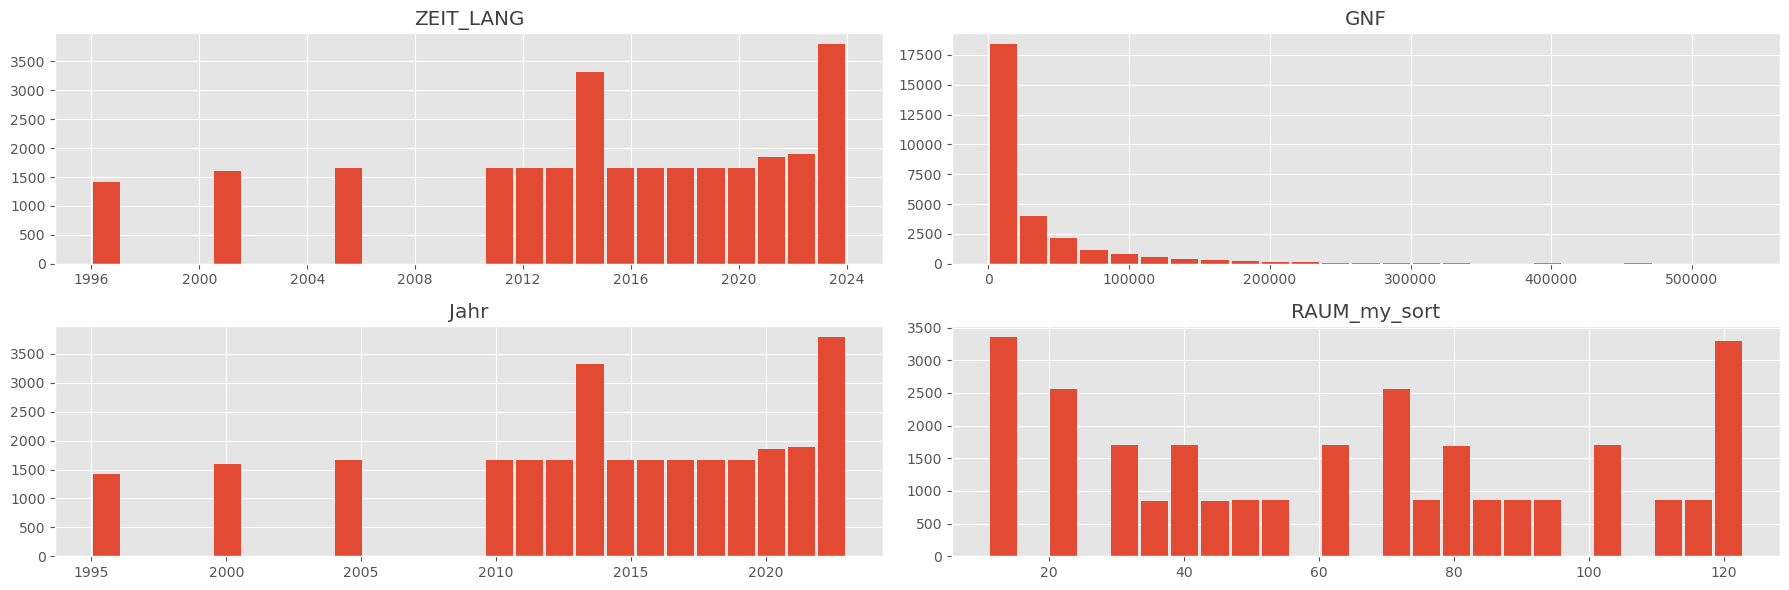

In [23]:
plt.style.use('ggplot')
params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }
plt.rcParams.update(params)

try:
    data2betested.hist(bins=25, rwidth=0.9)
    plt.tight_layout()
    plt.show()
except:
    print("No numercial data to plot.") 

### Gibt es Duplikate?

In [24]:
# find duplicate rows
duplicate_rows = data2betested[data2betested.duplicated()]
duplicate_rows

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,BAP_LANG,BAP_CODE,GNA_LANG,...,HPN_CODE,GNF,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr_str,Jahr,RAUM_my_sort
StichtagDatJahr,,,,,,,,,,,,,,,


### Nullwerte und Missings?

In [25]:
data2betested.isnull().sum()

ZEIT_LANG              0
ZEIT_CODE              0
RAUM_LANG              0
RAUM_CODE              0
BAP_LANG               0
BAP_CODE               0
GNA_LANG               0
GNA_CODE               0
HPN_LANG               0
HPN_CODE               0
GNF                    0
KREISEZH_LANG          0
KREISEZH_CODE          0
StichtagDatJahr_str    0
Jahr                   0
RAUM_my_sort           0
dtype: int64

In [26]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
#import missingno as msno
#msno.matrix(data2betested, labels=True, sort='descending');
#msno.heatmap(data2betested)

### Gruppierungen

In [27]:
agg_jahr = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr']) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values('Jahr', ascending=False) 
agg_jahr.reset_index().head(3)

,Jahr,sum_GeschossNFl
0,2023,59430204
1,2022,59062502
2,2021,58572155


In [28]:
agg_Quarts = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['RAUM_my_sort', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values('RAUM_CODE', ascending=False) 
agg_Quarts.reset_index().head(50)

,RAUM_my_sort,RAUM_LANG,RAUM_CODE,sum_GeschossNFl
0,123,Hirzenbach,R00123,15624921
1,122,Schwamendingen-Mitte,R00122,16058392
2,121,Saatlen,R00121,11402720
3,119,Seebach,R00119,53806129
4,115,Oerlikon,R00115,51962582
5,111,Affoltern,R00111,36284824
6,102,Wipkingen,R00102,25219467
7,101,Höngg,R00101,45113232
8,92,Altstetten,R00092,82113977
9,91,Albisrieden,R00091,35162436


In [29]:
agg_BAP = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['BAP_LANG', 'BAP_CODE', ]) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values('BAP_CODE', ascending=True) 
agg_BAP.reset_index().head(50)

,BAP_LANG,BAP_CODE,sum_GeschossNFl
0,1900 bis 1919,BAP2106,72618640
1,1920 bis 1939,BAP2107,133629240
2,1940 bis 1959,BAP2108,150369671
3,1960 bis 1979,BAP2109,206120725
4,1980 bis 1999,BAP2110,140792074
5,2000 bis 2019,BAP2111,134735165
6,2020 bis 2039,BAP2112,4772135
7,Vor 1900,BAP8900,105821585


In [30]:

agg_GNA = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['GNA_LANG','GNA_CODE', 'HPN_LANG', 'HPN_CODE',]) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values('GNA_CODE', ascending=True) 
agg_GNA.reset_index().head(50)

,GNA_LANG,GNA_CODE,HPN_LANG,HPN_CODE,sum_GeschossNFl
0,Wohnen,GNA1010,"Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ...",HPN0001,370776039
1,Verkauf,GNA1020,"Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ...",HPN0001,41776727
2,Produktion,GNA1030,"Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ...",HPN0001,30776648
3,Lagerung,GNA1040,"Ist nicht Hauptnutzung (Lager, Parkierung)",HPN0000,218706345
4,Parkieren,GNA1050,"Ist nicht Hauptnutzung (Lager, Parkierung)",HPN0000,71468526
5,Büros,GNA1060,"Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ...",HPN0001,143334124
6,übrige Zwecke,GNA1090,"Ist Hauptnutzung (Wohnen, Büro, Verkauf, Produ...",HPN0001,72020826


In [31]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'BAP_LANG', 'BAP_CODE', 'GNA_LANG',
       'GNA_CODE', 'HPN_LANG', 'HPN_CODE', 'GNF', 'KREISEZH_LANG', 'KREISEZH_CODE',
       'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

### Zeitpunkte und Zeiträume abfragen

A particular powerful feature of the Pandas DataFrame is its indexing capability that also works using time-based entities, such as dates and times. We have already created the index above, so let's put it to use.

In [32]:
data2betested.loc[data_max_date].head(2)
#data2betested.loc["2021-10-31":"2021-11-30"].head(2)

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,BAP_LANG,BAP_CODE,GNA_LANG,...,HPN_CODE,GNF,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr_str,Jahr,RAUM_my_sort
StichtagDatJahr,,,,,,,,,,,,,,,
2023-12-31,2023-12-31,Z31122023,Weinegg,R00083,1900 bis 1919,BAP2106,Büros,...,HPN0001,8534,Kreis 8 (ab 1915),R01100,2023-12-31,2023,83
2023-12-31,2023-12-31,Z31122023,Unterstrass,R00061,2000 bis 2019,BAP2111,Wohnen,...,HPN0001,201925,Kreis 6 (ab 1934),R01200,2023-12-31,2023,61


### Visualisierungen nach Zeitausschnitten

#### Entwicklung Geschossflächennutzungen seit ...

In [33]:
myAgg1 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr']) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=False) 

myAgg1.reset_index().tail(6)

,StichtagDatJahr,sum_GeschossNFl
11,2012-12-31,54763522
12,2011-12-31,54205122
13,2010-12-31,53653031
14,2005-12-31,53081703
15,2000-12-31,51284455
16,1995-12-31,50714336


In [34]:
grafik1 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg1.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GeschossNFl:Q'
    , myTitle = "Entwicklung der Geschossflächen seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Anz. Personen'
    , warning_status  = "ignore"
    , category=''
    , category_beschriftung=''
)
grafik1

alt.LayerChart(...)

Speichere diese Grafik mit Zeitstempel:

In [35]:
grafic_name = package_name+"_alt1_total"+date_today+".png"
print('grafiken_testing/'+grafic_name)
#grafik1.save('grafiken_testing/'+grafic_name+'.html', embed_options={'renderer':'svg'})
grafik1.save('/content/colab/losd/saved_data/'+grafic_name)

grafiken_testing/bau523od5231_alt1_total_2024-07-04.png


#### Entwicklung Geschossflächen nach Stadtquartier seit ...

In [36]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'BAP_LANG', 'BAP_CODE', 'GNA_LANG',
       'GNA_CODE', 'HPN_LANG', 'HPN_CODE', 'GNF', 'KREISEZH_LANG', 'KREISEZH_CODE',
       'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [37]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg2 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg2.reset_index().head(3)

,StichtagDatJahr,RAUM_LANG,RAUM_CODE,sum_GeschossNFl
0,1995-12-31,Affoltern,R00111,1640170
1,1995-12-31,Mühlebach,R00082,974412
2,1995-12-31,Oberstrass,R00063,1718638


In [38]:
grafik2 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg2.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GeschossNFl:Q'
    , myTitle = "Entwicklung der Geschossflächen nach Stadtquartier, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Geschossfläche'
    , warning_status  = "ignore"
    , category='RAUM_LANG:N'
    , category_beschriftung='Stadtquartier'
)
grafik2

alt.LayerChart(...)

In [39]:
grafic_name = package_name+"_alt2_raum_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik2.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau523od5231_alt2_raum_zeit_2024-07-04.png


#### Entwicklung Geschossnutzfläche nach Stadtquartier der Kreise 10-12, 1941-1981

In [40]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg3 = data2betested\
    .groupby(['StichtagDatJahr', 'RAUM_CODE', 'RAUM_LANG', 'RAUM_my_sort']) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg3.reset_index().head(3)


,StichtagDatJahr,RAUM_CODE,RAUM_LANG,RAUM_my_sort,sum_GeschossNFl
0,1995-12-31,R00011,Rathaus,11,718405
1,1995-12-31,R00073,Hirslanden,73,841453
2,1995-12-31,R00074,Witikon,74,1085469


In [41]:
grafik3 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg3.reset_index().query('RAUM_my_sort>100')
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GeschossNFl:Q'
    , myTitle = "Entwicklung der Geschossflächen nach ausgewählten Stadtquartieren, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Geschossfläche'
    , warning_status  = "ignore"
    , category='RAUM_LANG:N'
    , category_beschriftung='Stadtquartier'
)
grafik3

alt.LayerChart(...)

#### Entwicklung Geschossnutzfläche nach Bauperioden

In [42]:
myAgg4 = data2betested\
    .groupby(['StichtagDatJahr', 'BAP_LANG', 'BAP_CODE']) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg4.reset_index().head(3)

,StichtagDatJahr,BAP_LANG,BAP_CODE,sum_GeschossNFl
0,1995-12-31,1900 bis 1919,BAP2106,4570219
1,1995-12-31,1920 bis 1939,BAP2107,8028608
2,1995-12-31,1940 bis 1959,BAP2108,9602720


In [43]:
grafik4 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg4.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GeschossNFl:Q'
    , myTitle = "Entwicklung der Geschossflächen nach Bauperioden, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Geschossfläche'
    , warning_status  = "ignore"
    , category='BAP_LANG:N'
    , category_beschriftung='Bauperiode'
)
grafik4

alt.LayerChart(...)

In [44]:
grafic_name = package_name+"_alt3_bauperiode_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik4.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau523od5231_alt3_bauperiode_zeit_2024-07-04.png


#### Entwicklung Geschossnutzfläche nach Geschossnutzung

In [45]:
myAgg5 = data2betested\
    .groupby(['StichtagDatJahr', 'GNA_LANG','GNA_CODE']) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values(['GNA_CODE','StichtagDatJahr'], ascending=[True, True]) 

myAgg5.reset_index().head(5)

,StichtagDatJahr,GNA_LANG,GNA_CODE,sum_GeschossNFl
0,1995-12-31,Wohnen,GNA1010,18678053
1,2000-12-31,Wohnen,GNA1010,18768168
2,2005-12-31,Wohnen,GNA1010,19288878
3,2010-12-31,Wohnen,GNA1010,20806093
4,2011-12-31,Wohnen,GNA1010,21075488


In [46]:
grafik5 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg5.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GeschossNFl:Q'
    , myTitle = "Entwicklung der Geschossflächen nach Geschossnutzungsart, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Geschossfläche'
    , warning_status  = "ignore"
    , category='GNA_LANG:N'
    , category_beschriftung='Geschossnutzungsart'
)
grafik5

alt.LayerChart(...)

In [47]:
grafic_name = package_name+"_alt4_gna_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik5.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau523od5231_alt4_gna_zeit_2024-07-04.png


#### Barcharts mit Seaborn

In [48]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAggBar = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr', 'GNA_LANG','GNA_CODE','StichtagDatJahr_str']) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values(['GNA_CODE','StichtagDatJahr'], ascending=[True, True]) 

myAggBar.reset_index().head(5)

,StichtagDatJahr,GNA_LANG,GNA_CODE,StichtagDatJahr_str,sum_GeschossNFl
0,1995-12-31,Wohnen,GNA1010,1995-12-31,18678053
1,2000-12-31,Wohnen,GNA1010,2000-12-31,18768168
2,2005-12-31,Wohnen,GNA1010,2005-12-31,19288878
3,2010-12-31,Wohnen,GNA1010,2010-12-31,20806093
4,2011-12-31,Wohnen,GNA1010,2011-12-31,21075488


In [49]:
#help(sns.catplot)     

In [50]:
#Stile for the following sns graphs
sns.set_theme(style="whitegrid")

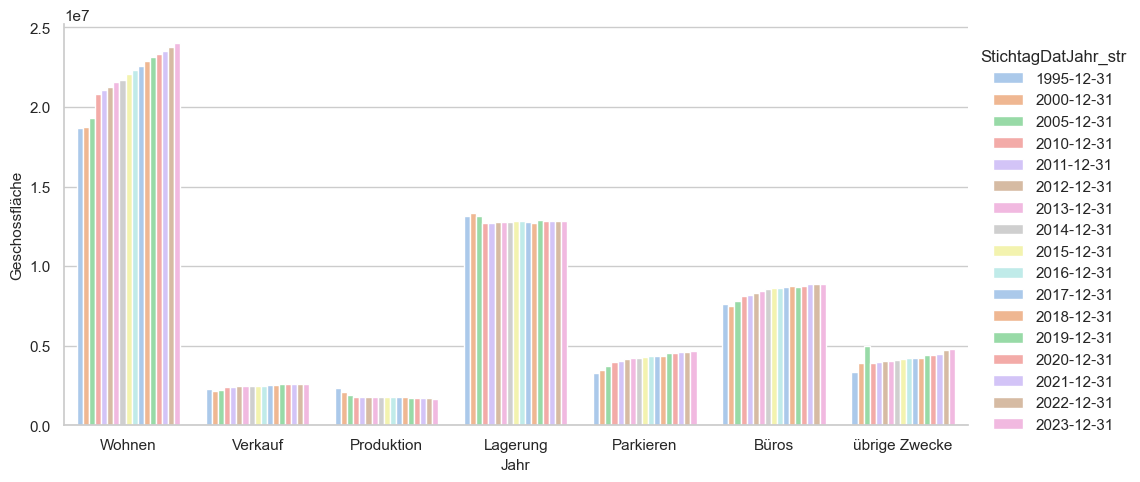

In [51]:
#sns.color_palette("flare", as_cmap=True)
myHist = sns.catplot(x="GNA_LANG"
            , y="sum_GeschossNFl"
            , hue="StichtagDatJahr_str"
            , kind="bar" #boxen, violin, --> wenn die aggregation nicht genau den werten in der grafik entspricht
            , palette="pastel" #, color="green"
            , height=5
            , aspect=2
            , order=None, legend_out=True
            ,data=myAggBar.reset_index()
           )
myHist.set_xlabels('Jahr', fontsize=11) # not set_label
myHist.set_ylabels('Geschossfläche', fontsize=11)

myHist


In [52]:
grafic_name = package_name+"_bar_gna_zeit"+date_today+".png"

print('grafiken_testing/'+grafic_name)


myHist.savefig('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau523od5231_bar_gna_zeit_2024-07-04.png


#### Faced Grids

In [53]:
myFG = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr','StichtagDatJahr_str', 'RAUM_LANG', 'RAUM_CODE', 'RAUM_my_sort', 'GNA_LANG','GNA_CODE']) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values(['RAUM_my_sort','Jahr'], ascending=[True, True]) 

myFG

sum_GeschossNFl
Jahr StichtagDatJahr_str RAUM_LANG  RAUM_CODE RAUM_my_sort GNA_LANG      GNA_CODE                 
1995 1995-12-31          Rathaus    R00011    11           Büros         GNA1060            141064
                                                           Lagerung      GNA1040            168335
                                                           Parkieren     GNA1050              3840
                                                           Produktion    GNA1030             17942
                                                           Verkauf       GNA1020            137809
...                                                                                            ...
2023 2023-12-31          Hirzenbach R00123    123          Parkieren     GNA1050             67645
                                                           Produktion    GNA1030              7711
                                                           Verkauf       GNA1020             23291
                                                           Wohnen        GNA1010            595621
                                                           übrige Zwecke GNA1090             89178

[4046 rows x 1 columns]

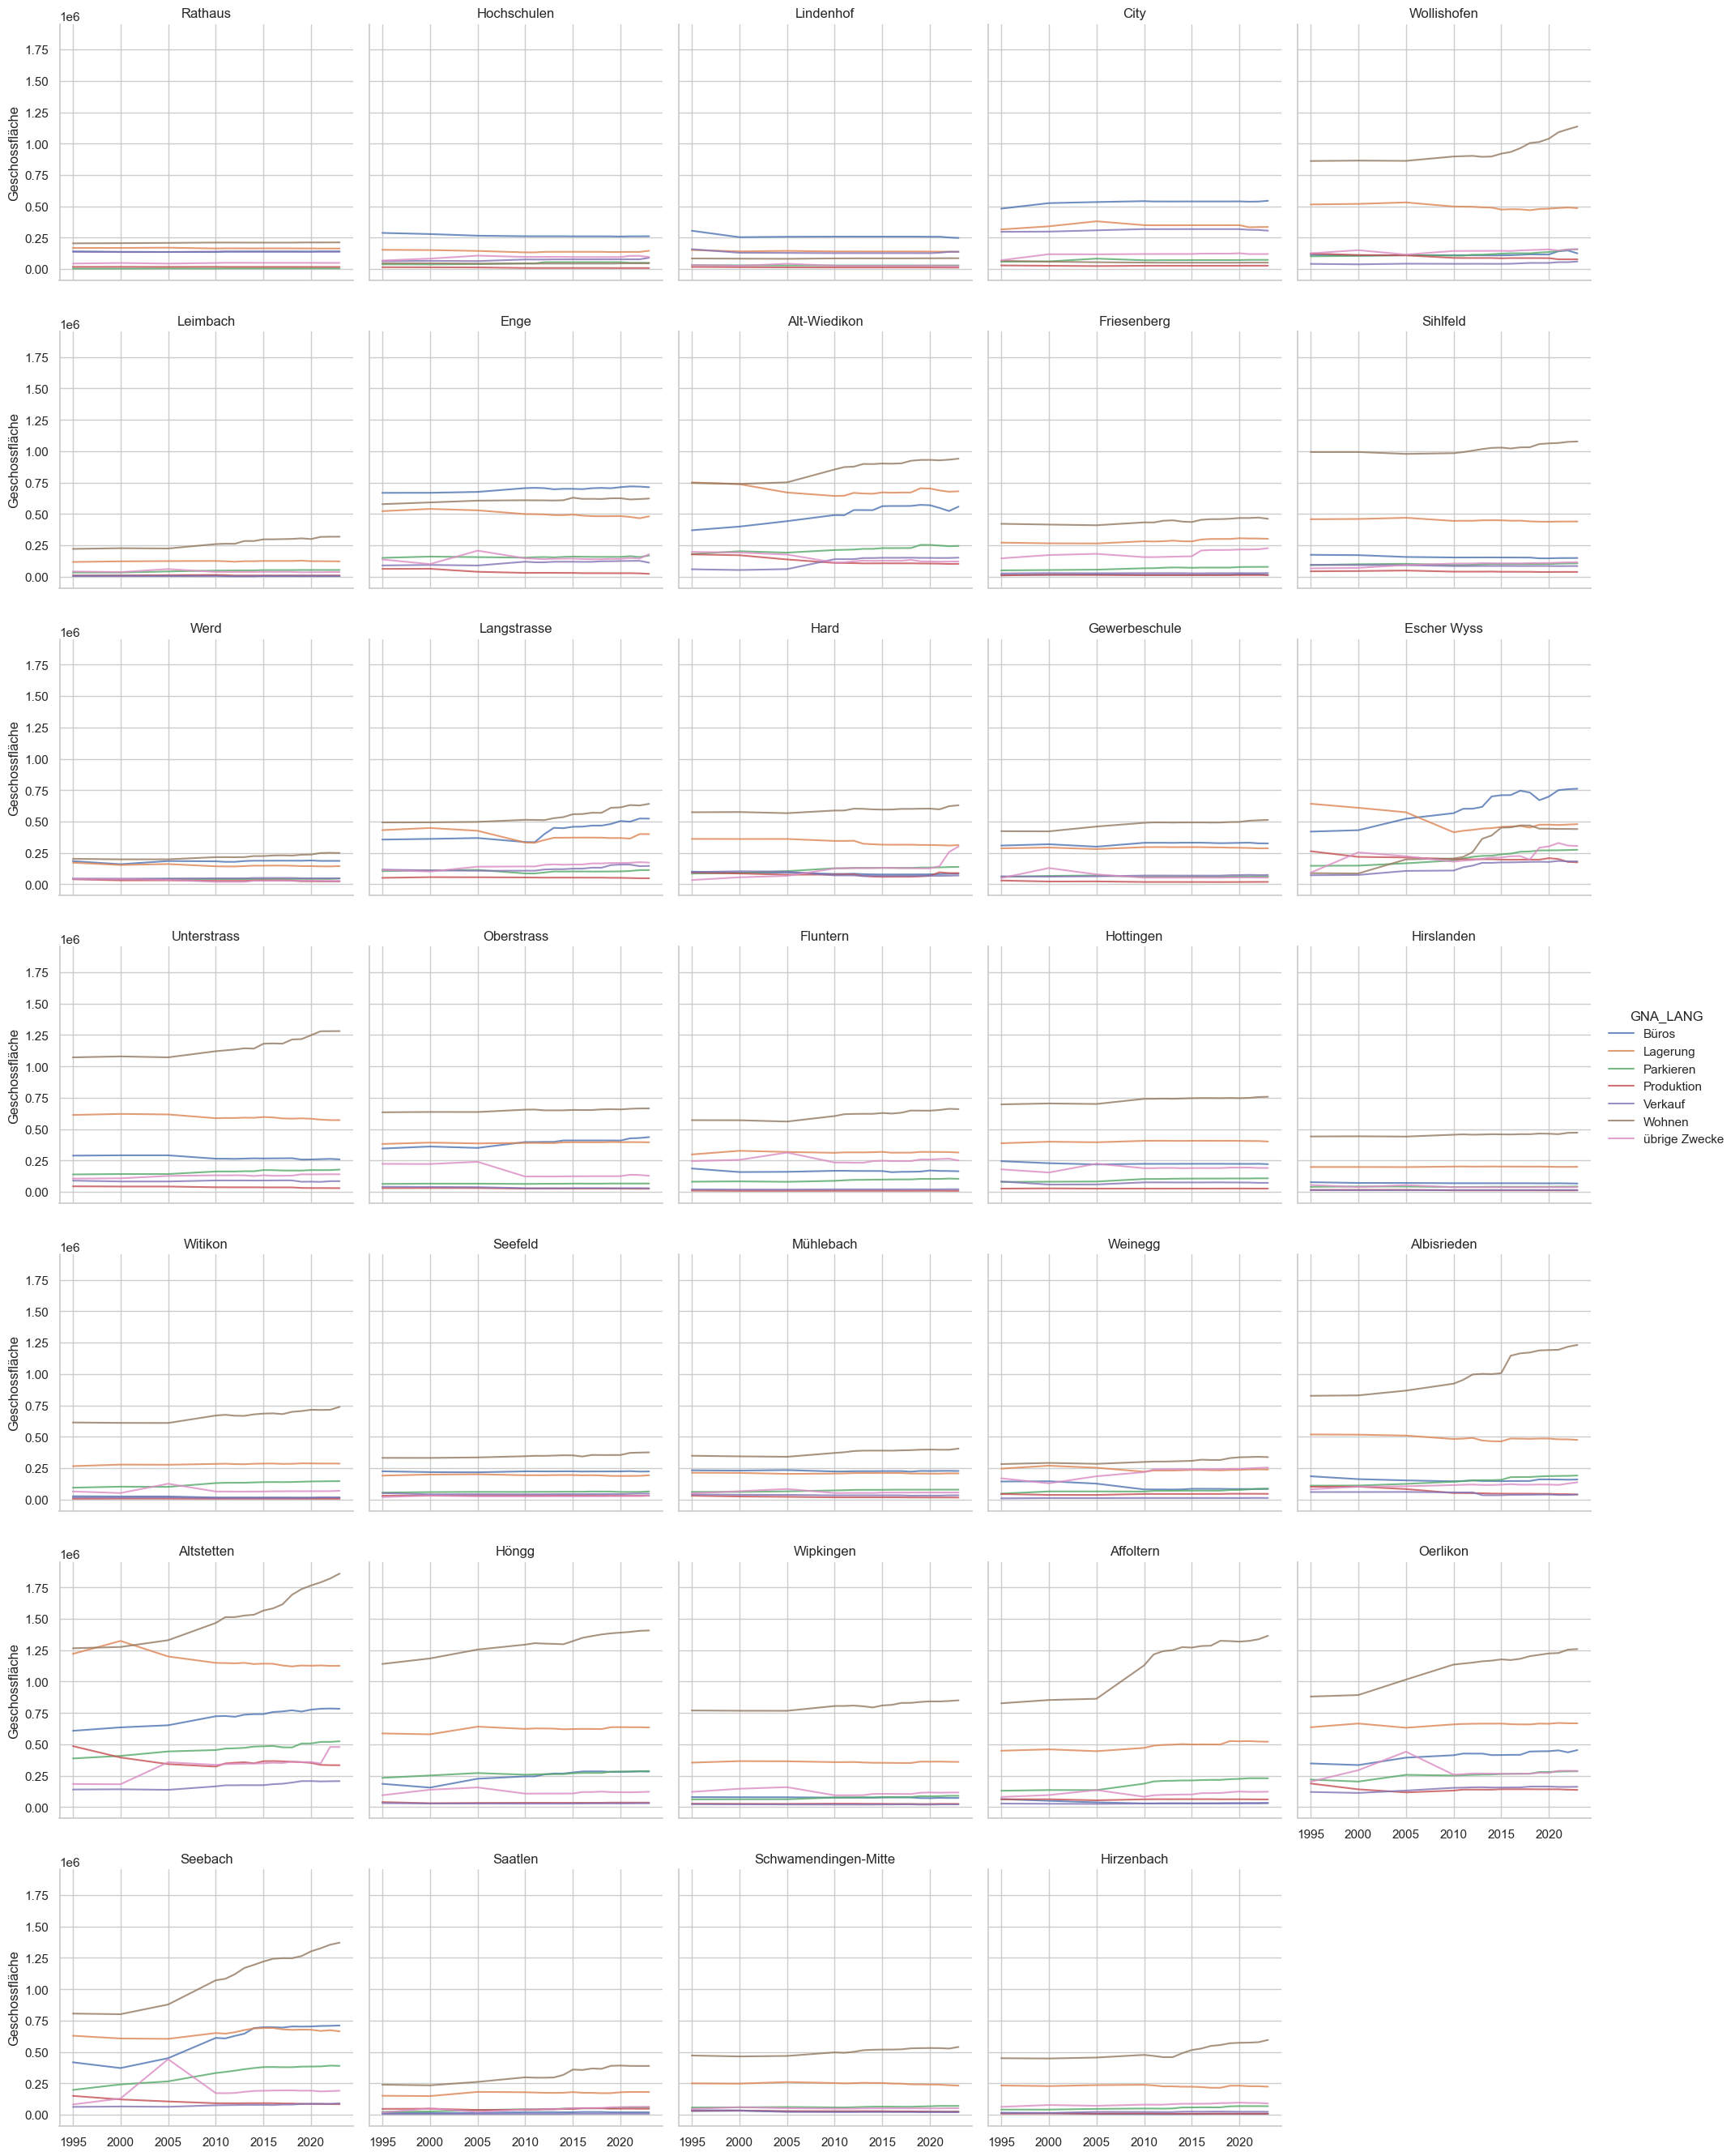

In [54]:
faced_grid1 = mypy_dv.plot_sns_facetgrid(
    data = myFG.reset_index()
    , col = "RAUM_LANG"
    , hue = "GNA_LANG"
    , col_wrap = 5
    , height = 3
    , grafiktyp = sns.lineplot
    , x = "Jahr"
    , y = "sum_GeschossNFl"
    , ylabel= "Geschossfläche"
    )

In [55]:
grafic_name = package_name+"_fg_raum_zeit"+date_today+".png"

print('grafiken_testing/'+grafic_name)


faced_grid1.savefig('grafiken_testing/'+grafic_name)

grafiken_testing/bau523od5231_fg_raum_zeit_2024-07-04.png


#### Treemaps

In [56]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'BAP_LANG', 'BAP_CODE', 'GNA_LANG',
       'GNA_CODE', 'HPN_LANG', 'HPN_CODE', 'GNF', 'KREISEZH_LANG', 'KREISEZH_CODE',
       'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [57]:
myTM = data2betested.loc[data_max_date]\
    .groupby(['Jahr','StichtagDatJahr_str', 'RAUM_LANG', 'RAUM_CODE', 'RAUM_my_sort', 'KREISEZH_LANG', 'KREISEZH_CODE','GNA_LANG','GNA_CODE', 'BAP_LANG', 'BAP_CODE']) \
    .agg(sum_GeschossNFl=('GNF', 'sum')) \
    .sort_values(['RAUM_my_sort','Jahr'], ascending=[True, True]) 

myTM.reset_index().head(2)

,Jahr,StichtagDatJahr_str,RAUM_LANG,RAUM_CODE,RAUM_my_sort,KREISEZH_LANG,KREISEZH_CODE,GNA_LANG,GNA_CODE,BAP_LANG,BAP_CODE,sum_GeschossNFl
0,2023,2023-12-31,Rathaus,R00011,11,Kreis 1 (Stadtgebiet vor 1893),R10000,Büros,GNA1060,1900 bis 1919,BAP2106,15606
1,2023,2023-12-31,Rathaus,R00011,11,Kreis 1 (Stadtgebiet vor 1893),R10000,Büros,GNA1060,1920 bis 1939,BAP2107,7397


In [58]:
#, levels = "'GNA_LANG', 'BAP_LANG','KREISEZH_LANG'"

treeMap1 = mypy_dv.plot_px_treemap(
    data=myTM.reset_index()
    ,levels=["BAP_LANG", "GNA_LANG", "KREISEZH_LANG"]
    ,values="sum_GeschossNFl"
    ,color="GNA_LANG"
    ,myHeaderTitle="Geschossnutzung nach Bauperiode und Stadtkreis, "+data_max_date
    ,color_discrete_map={'(?)':'lightgrey', 'Wohnen':'lightblue'}                
    #,margin_val_bottom=25
)
treeMap1


path: [<plotly.express._special_inputs.Constant object at 0x00000233E9E59990>, 'BAP_LANG', 'GNA_LANG', 'KREISEZH_LANG']
Typ von path: <class 'list'>


In [59]:
grafic_name = package_name+"_tm_bauperiode_nutzung"+date_today+".png"
print(grafic_name)

treeMap1.write_image('grafiken_testing/'+grafic_name)

bau523od5231_tm_bauperiode_nutzung_2024-07-04.png


AttributeError: 'NoneType' object has no attribute 'write_image'

## ---------------------- hier Plausi beendet

Übersicht zu LOSD-Jobs:
[Sharepoint](https://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/OGD%20Metadaten.aspx#InplviewHasheb69a2c0-ed94-4ef2-91a5-3b19f038e442=FilterField1%3DMetadaten%255Fx002d%255FPublikations%255Fx00-FilterValue1%3DINT)